In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'numpy'

In [1]:
pip install numpy


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/workspaces/Practice-mlops/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.shape


(7043, 21)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
missing_values = df.isnull().sum()
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
count_churned = df['Churn'].value_counts()['Yes']
count_not_churned = df['Churn'].value_counts()['No']
total_customers = len(df)

In [10]:
percentage_churned = (count_churned / total_customers) * 100
percentage_not_churned = (count_not_churned / total_customers) * 100

In [11]:
print(f"Count of customers who churned: {count_churned}")
print(f"Percentage of customers who churned: {percentage_churned:.2f}%")
print(f"Count of customers who did not churn: {count_not_churned}")
print(f"Percentage of customers who did not churn: {percentage_not_churned:.2f}%")

Count of customers who churned: 1869
Percentage of customers who churned: 26.54%
Count of customers who did not churn: 5174
Percentage of customers who did not churn: 73.46%


/tmp/ipykernel_39055/4147862084.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette='Set2')


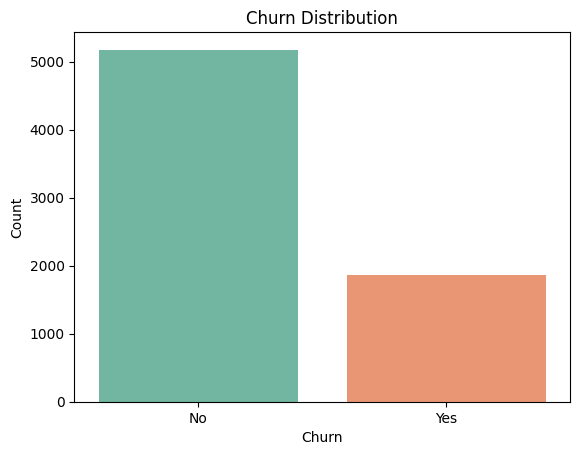

In [12]:
sns.countplot(x="Churn", data=df, palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.grid(False)
plt.show()

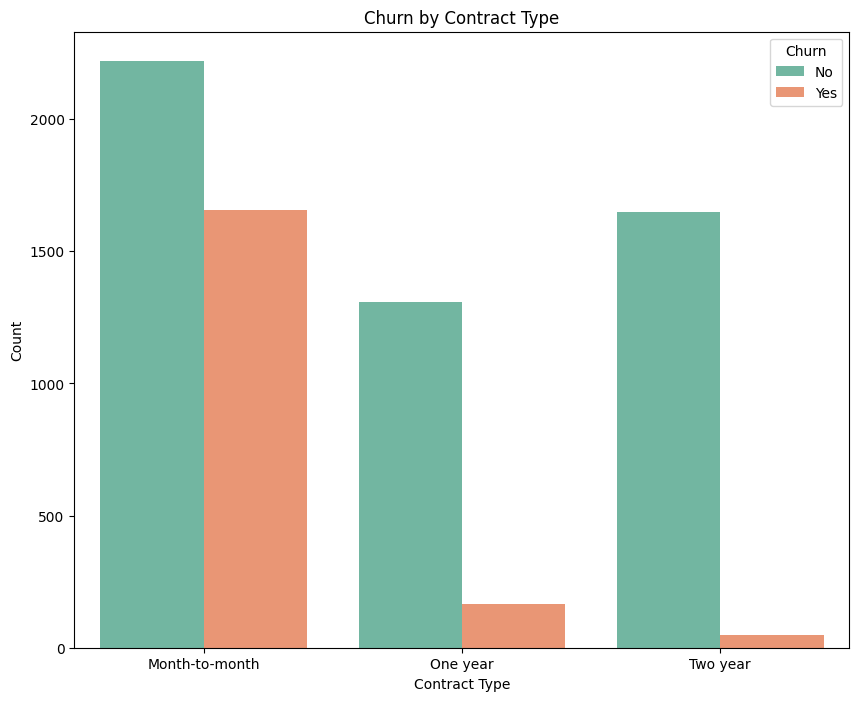

In [13]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.grid(False)
plt.show()

In [14]:
df.drop('customerID', axis=1, inplace=True)

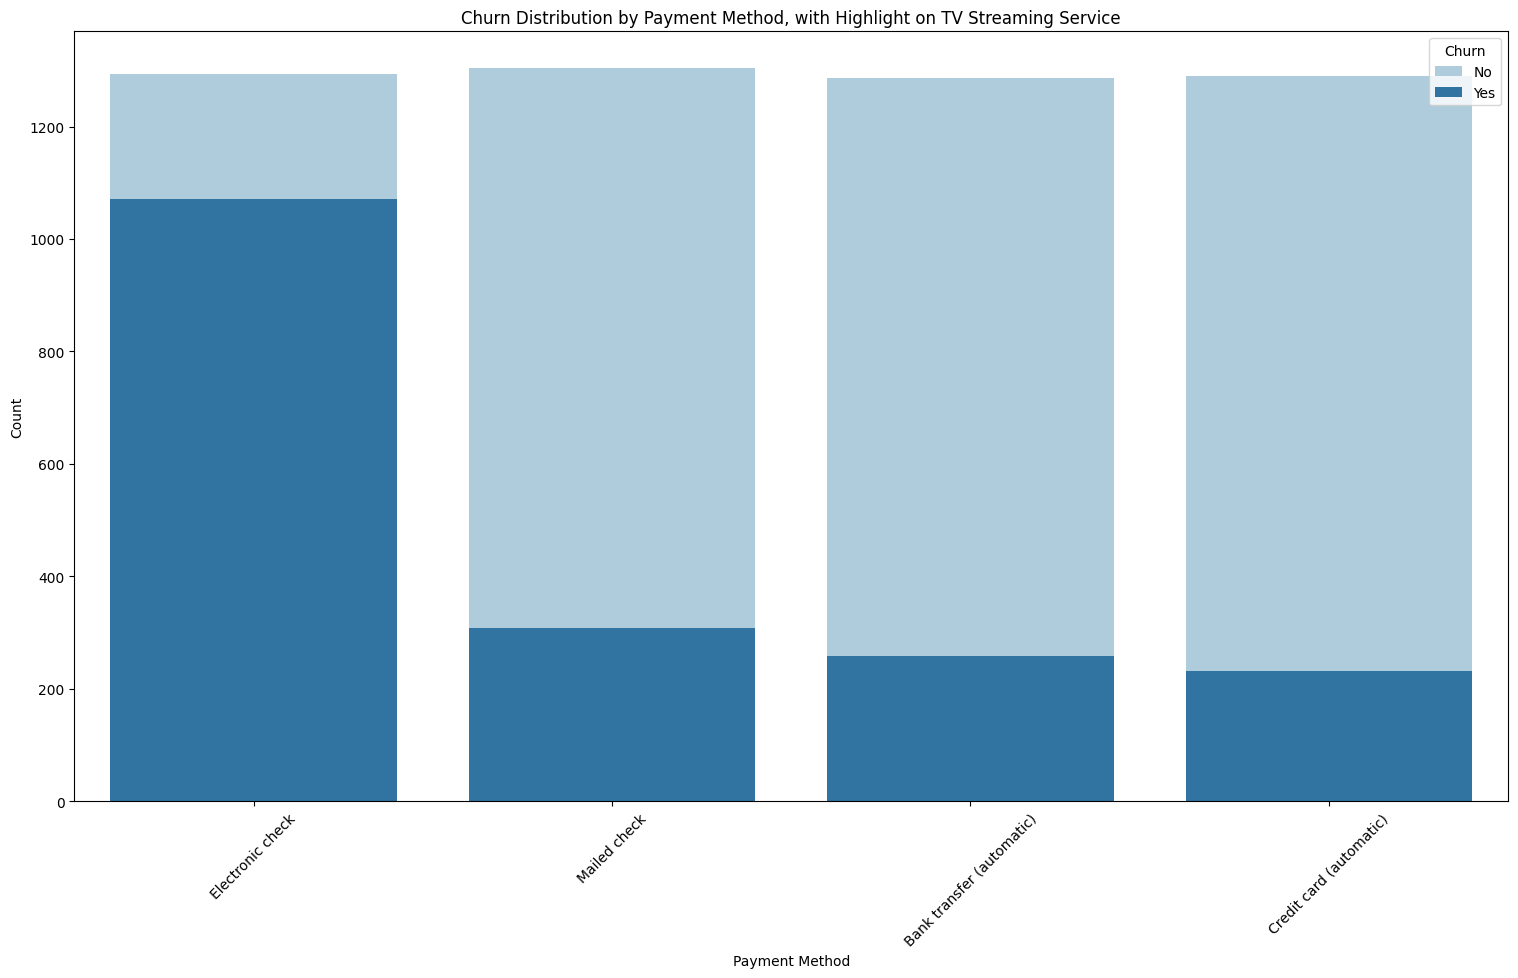

In [15]:
plt.figure(figsize=(18.5, 10))

# Churn count by payment method
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='Paired', hue_order=['No', 'Yes'], dodge=False)

plt.title('Churn Distribution by Payment Method, with Highlight on TV Streaming Service')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.grid(False)
plt.show()

In [16]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", "0")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# 1. Histograms for numerical features, segmented by Churn
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


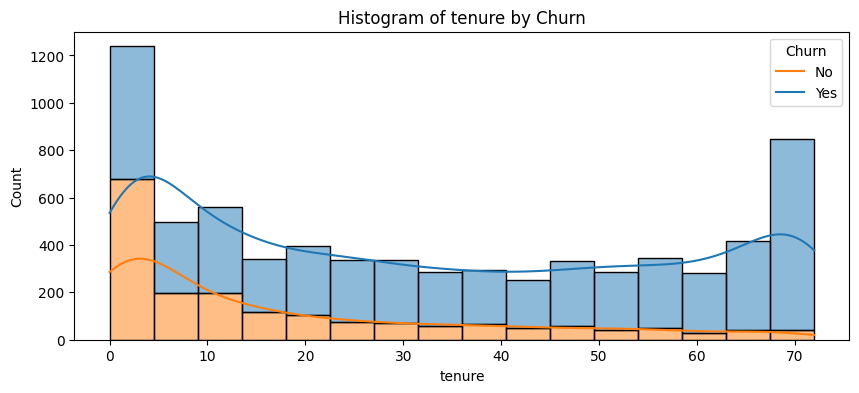

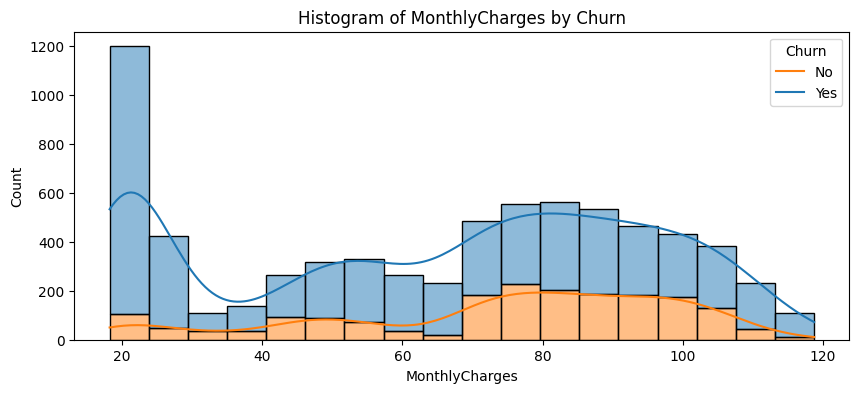

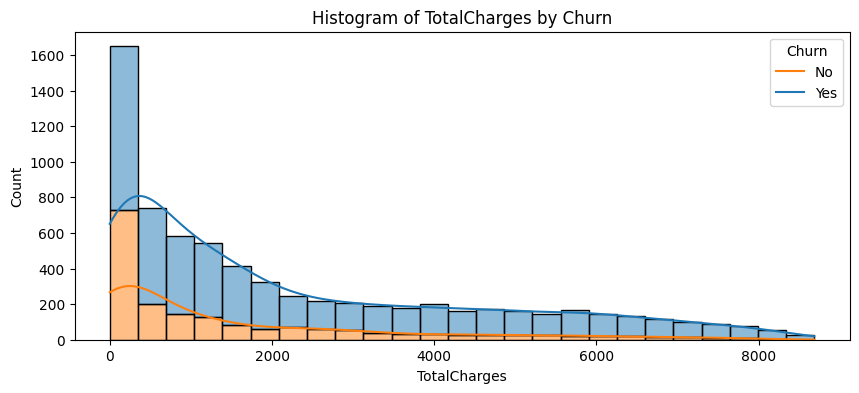

In [18]:
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=feature, hue='Churn', kde=True, multiple='stack')
    plt.title(f'Histogram of {feature} by Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.show()

In [19]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [23]:
churn_by_gender = df.groupby('gender')['Churn'].mean()
churn_by_senior = df.groupby('SeniorCitizen')['Churn'].mean()
churn_by_dependents = df.groupby('Dependents')['Churn'].mean()

TypeError: agg function failed [how->mean,dtype->object]

In [20]:
from sklearn.preprocessing import LabelEncoder 

In [21]:
Label_pre = LabelEncoder() 
data_cols=df.select_dtypes(exclude=['int','float']).columns 

In [22]:
label_col =list(data_cols) 
print(label_col)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [24]:
df[label_col]= df[label_col].apply(lambda col:Label_pre.fit_transform(col)) 

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [26]:
churn_by_gender = df.groupby('gender')['Churn'].mean()
churn_by_senior = df.groupby('SeniorCitizen')['Churn'].mean()
churn_by_dependents = df.groupby('Dependents')['Churn'].mean()

In [27]:
churn_by_gender, churn_by_senior, churn_by_dependents

(gender
 0    0.269209
 1    0.261603
 Name: Churn, dtype: float64,
 SeniorCitizen
 0    0.236062
 1    0.416813
 Name: Churn, dtype: float64,
 Dependents
 0    0.312791
 1    0.154502
 Name: Churn, dtype: float64)

In [28]:
X = df.drop("Churn", axis=1) # Drop the target column to get the features
y = df["Churn"]

In [29]:
X.shape

(7043, 19)

In [30]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression